In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [50]:
fs = 44100
t_f = 5

t = np.arange(t_f*fs)/fs

In [51]:
def get_superposition(f0s = [435, 440, 445]):
    x = np.zeros(t.shape)
    for f0 in f0s:
        x += np.cos(2*np.pi*f0*t)
    return x

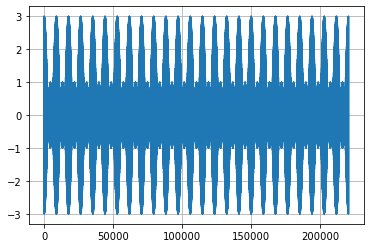

In [52]:
x = get_superposition()
plt.plot(x)
plt.grid()

Audio(x,rate=fs)

In [53]:
def get_window():
    f0 = 1/(2*t_f)
    return np.sin(2*np.pi*f0*t)**2

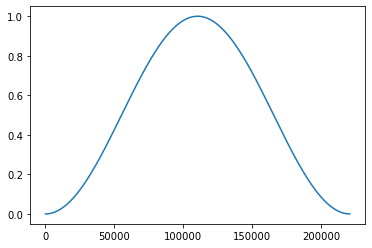

In [54]:
w = get_window()
plt.plot(w)

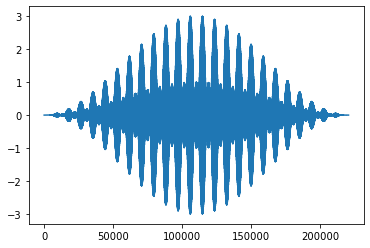

In [55]:
y = w*x

plt.plot(y)
Audio(y, rate=fs)

In [62]:
class EnvelopePoint:
    def __init__(self, t_ratio, x_value):
        self.t_ratio = t_ratio
        self.x_value = x_value

    def __repr__(self) -> str:
        return f'{self.t_ratio}: {self.x_value}'

In [83]:
attack_decay_sustain_release = [
    EnvelopePoint(0.1, 1),
    EnvelopePoint(0.2, 0.4),
    EnvelopePoint(0.8, 0.6),
    EnvelopePoint(1, 0)
]

In [84]:
def get_env(x_i, x_f, rel_t_i, rel_t_f):
    n_steps = int(np.round(t_f * (rel_t_f - rel_t_i) * fs))
    return np.linspace(x_i, x_f, n_steps, endpoint=False)

In [85]:
last_x_value, last_t_ratio = 0, 0
envelope = np.array([])
for adsr in attack_decay_sustain_release:
    print(adsr)
    envelope = np.hstack((
        envelope,
        get_env(last_x_value, adsr.x_value, last_t_ratio, adsr.t_ratio)
        ))
    last_x_value, last_t_ratio = adsr.x_value, adsr.t_ratio

0.1: 1
0.2: 0.4
0.8: 0.6
1: 0


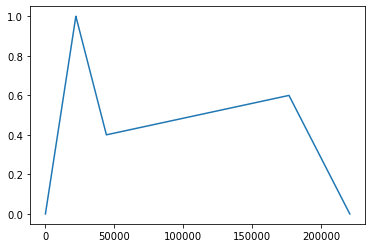

In [86]:
plt.figure()
plt.plot(envelope)

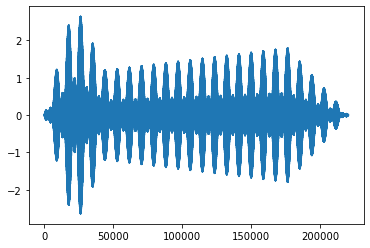

In [87]:
y = envelope*x

plt.plot(y)
Audio(y, rate=fs)